In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

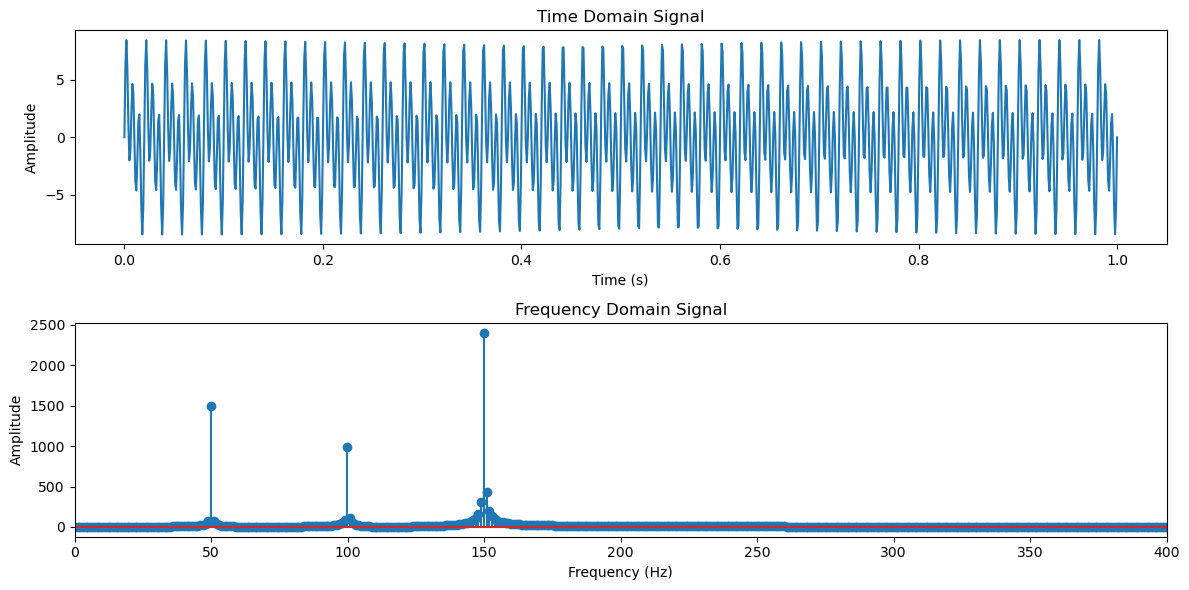

In [35]:
# 创建一个简单的正弦波信号
t = np.linspace(0, 1, 1000)  # 时间轴，从0到1秒，共1000个点
f0 = 50  # 正弦波的频率，50Hz
f1=100
f2=150
signal = 3*np.sin(2 * np.pi * f0 * t)+2*np.sin(2*np.pi*f1*t) +5*np.sin(2*np.pi*f2*t) # 正弦波信号

# 进行傅里叶变换
fft_result = np.fft.fft(signal)

# 获取频率轴的值
f = np.fft.fftfreq(signal.size, d=t[1] - t[0])

# 绘制时域信号
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 绘制频域信号
plt.subplot(2, 1, 2)
plt.stem(f, np.abs(fft_result))  # 使用stem函数绘制频谱
plt.title('Frequency Domain Signal')
plt.xlim(0,400)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


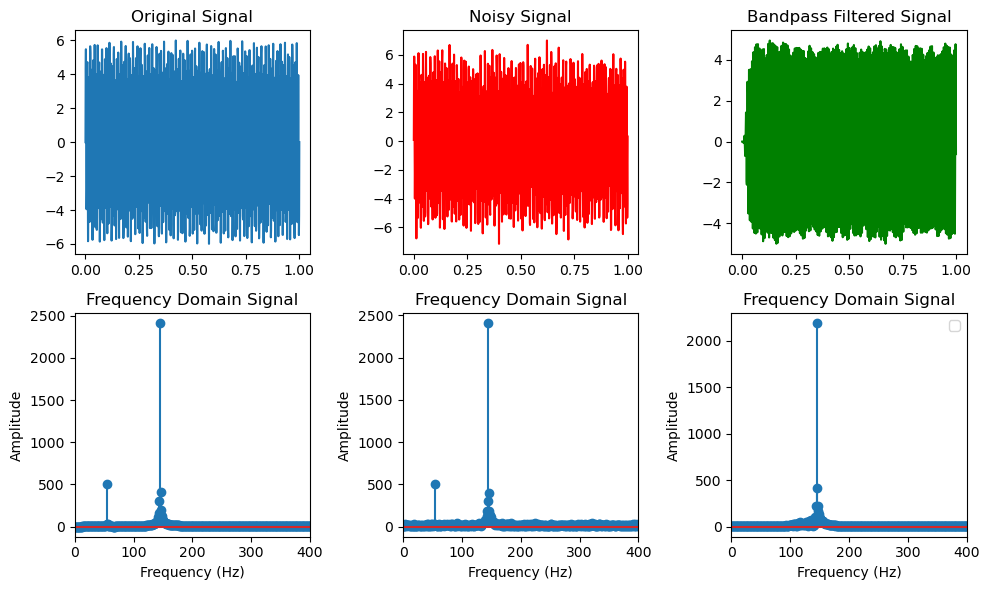

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# 信号参数
fs = 1000  # 采样频率（Hz）
t = np.linspace(0, 1, fs)  # 时间轴

# 创建一个包含两个频率的信号
f1 = 55  # 第一个正弦波频率（Hz）
f2 = 145  # 第二个正弦波频率（Hz）
signal = np.sin(2 * np.pi * f1 * t) + 5*np.sin(2 * np.pi * f2 * t)
fft_result1 = np.fft.fft(signal)

# 添加噪声
noise = 0.5 * np.random.normal(size=t.size)
noisy_signal = signal + noise
fft_result2= np.fft.fft(noisy_signal)

# 带通滤波器设计参数
f_low = 100  # 低截止频率（Hz）
f_high = 150  # 高截止频率（Hz）
order = 5  # 滤波器的阶数，可以根据需要调整

# 计算归一化截止频率（与 Nyquist 频率的比）
nyq_rate = 0.5 * fs
low = f_low / nyq_rate
high = f_high / nyq_rate

# 设计高通和低通滤波器
b_low, a_low = butter(order, low, btype='low')
b_high, a_high = butter(order, high, btype='high')

# 串联高通和低通滤波器来创建带通滤波器
b, a = butter(order, [low, high], btype='band')

# 应用带通滤波器
filtered_signal = lfilter(b, a, noisy_signal)
fft_result3 = np.fft.fft(filtered_signal)

# 绘制信号
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')

plt.subplot(2, 3, 2)
plt.plot(t, noisy_signal, label='Noisy Signal', color='r')
plt.title('Noisy Signal')

plt.subplot(2, 3, 3)
plt.plot(t, filtered_signal, label='Filtered Signal', color='g')
plt.title('Bandpass Filtered Signal')

#绘制频域信号
plt.subplot(2, 3, 4)
plt.stem(f, np.abs(fft_result1))  # 使用stem函数绘制频谱
plt.title('Frequency Domain Signal')
plt.xlim(0,400)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 5)
plt.stem(f, np.abs(fft_result2))  # 使用stem函数绘制频谱
plt.title('Frequency Domain Signal')
plt.xlim(0,400)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 6)
plt.stem(f, np.abs(fft_result3))  # 使用stem函数绘制频谱
plt.title('Frequency Domain Signal')
plt.xlim(0,400)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


# 为所有子图添加图例
plt.legend()
plt.tight_layout()
plt.show()